In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train[0].shape

(28, 28)

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

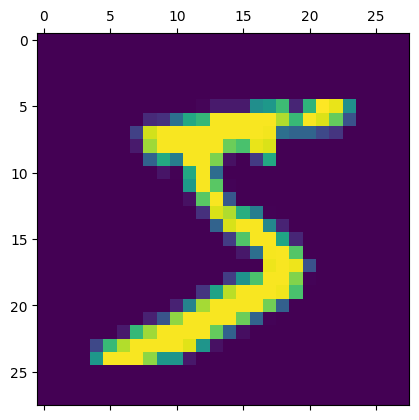

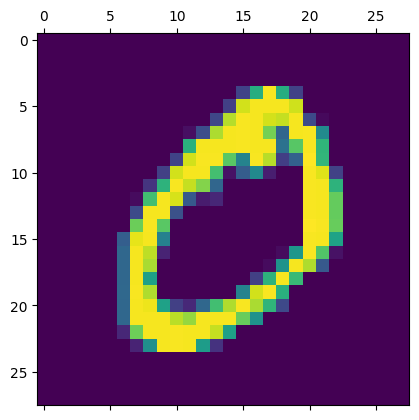

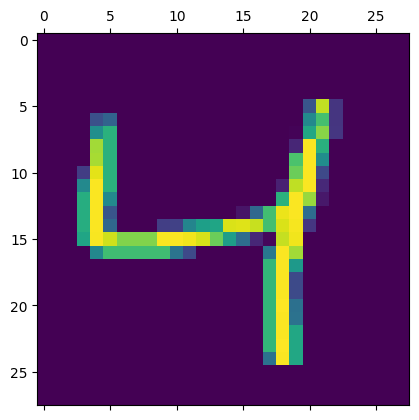

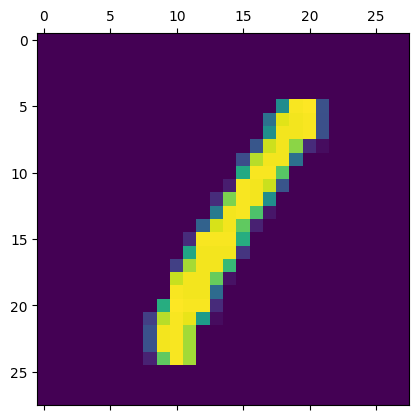

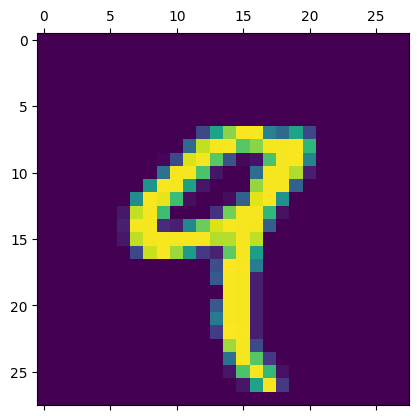

In [24]:
for i in range(5):
    plt.matshow(X_train[i])

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)


In [11]:
model = keras.Sequential([keras.layers.Dense(10,input_shape = (784,),activation = "sigmoid")
                         ])
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

model.fit(X_train_flattened,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4691 - accuracy: 0.8775
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3029 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2826 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2730 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2665 - accuracy: 0.9269


In [12]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2646 - accuracy: 0.9271


[0.2645769417285919, 0.9271000027656555]

313/313 [==============================] - 0s 1ms/step


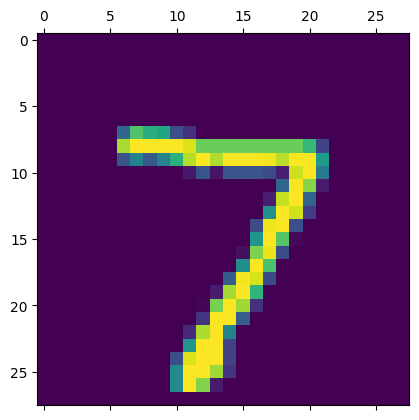

In [13]:
y_predicted = model.predict(X_test_flattened)
plt.matshow(X_test[0])

In [14]:
y_predicted[0]
np.argmax(y_predicted[0])

7

313/313 [==============================] - 0s 1ms/step


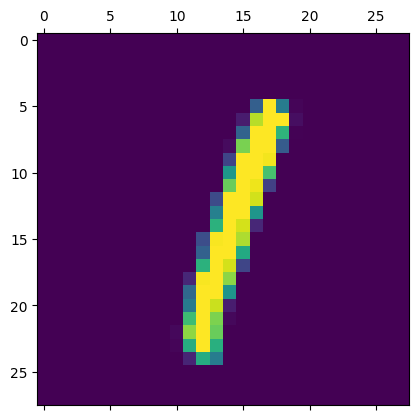

In [15]:
y_predicted = model.predict(X_test_flattened)
plt.matshow(X_test[5])

In [16]:
np.argmax(y_predicted[5])

1

In [17]:
y_predicted_labels = [ np.argmax(i) for i in y_predicted]

In [18]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Text(95.72222222222221, 0.5, 'TRUTH')

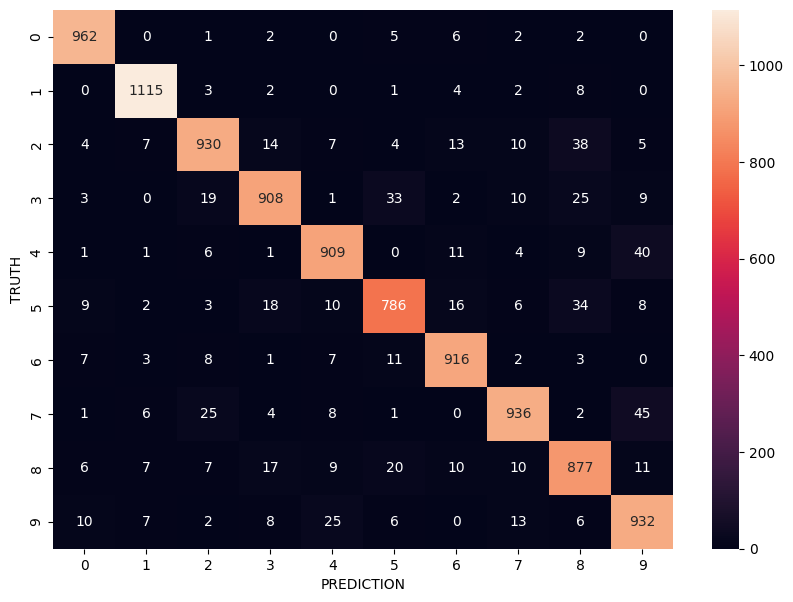

In [19]:
cm = tf.math.confusion_matrix(labels = Y_test,predictions =y_predicted_labels)
cm
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel("PREDICTION")
plt.ylabel("TRUTH")

Text(95.72222222222221, 0.5, 'TRUTH')

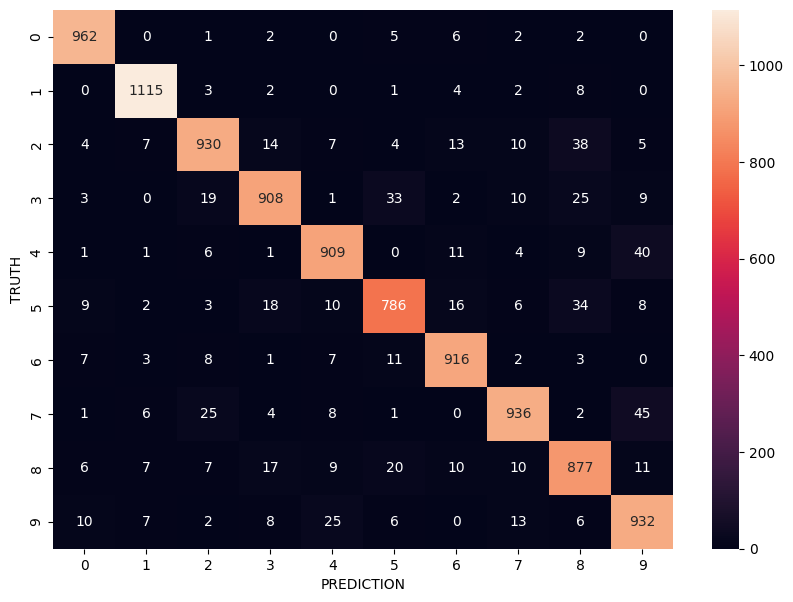

In [20]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel("PREDICTION")
plt.ylabel("TRUTH")

In [21]:
model = keras.Sequential([
    keras.layers.Dense(1000,input_shape = (784,),activation = "relu"),
    keras.layers.Dense(100,activation = "relu"),
    keras.layers.Dense(10,activation = "sigmoid")
    
                         ])
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

model.fit(X_train_flattened,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1876 - accuracy: 0.9425
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0780 - accuracy: 0.9754
Epoch 3/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0543 - accuracy: 0.9831
Epoch 4/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0391 - accuracy: 0.9877
Epoch 5/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0321 - accuracy: 0.9897


In [22]:
model.evaluate(X_test_flattened,Y_test)
y_predicted =  model.predict(X_test_flattened)
y_predicted_labels = [ np.argmax(i) for i in y_predicted]

313/313 [==============================] - 1s 3ms/step


Text(95.72222222222221, 0.5, 'TRUTH')

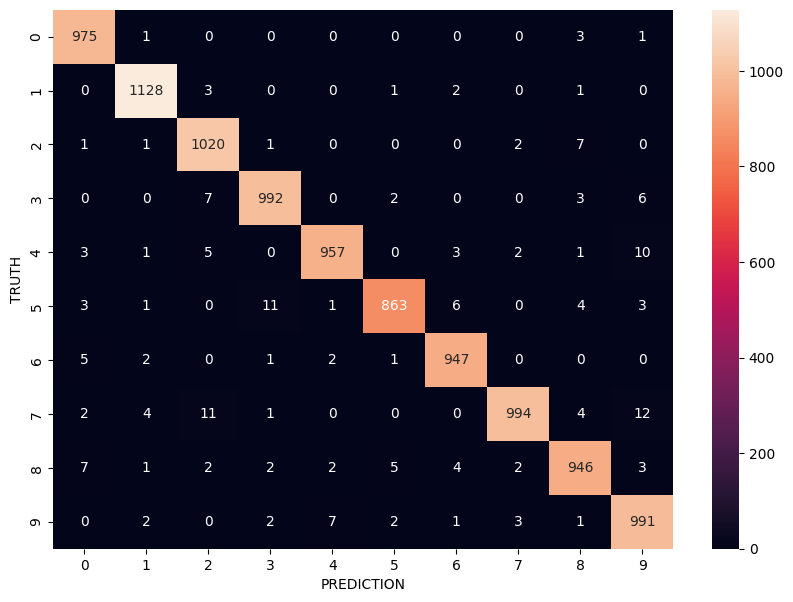

In [23]:
cm = tf.math.confusion_matrix(labels = Y_test,predictions =y_predicted_labels)
cm
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel("PREDICTION")
plt.ylabel("TRUTH")
